### Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow. keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn. model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

ModuleNotFoundError: No module named 'sklearn'

In [3]:
print(tf. __version__)

2.18.0


### Defining the path of dataset directory

In [4]:
dataset_path = "C:\Plant-Disease-Detection\Dataset"

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Myste\AppData\Local\Temp\ipykernel_7936\4018278682.py:1: SyntaxWarning: invalid escape sequence '\P'
  dataset_path = "C:\Plant-Disease-Detection\Dataset"


### Visualizing the images and Resize images

<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Myste\AppData\Local\Temp\ipykernel_7936\741475520.py:4: SyntaxWarning: invalid escape sequence '\P'
  dataset_path = "C:\Plant-Disease-Detection\Dataset\Potato___Early_blight"
C:\Users\Myste\AppData\Local\Temp\ipykernel_7936\741475520.py:4: SyntaxWarning: invalid escape sequence '\P'
  dataset_path = "C:\Plant-Disease-Detection\Dataset\Potato___Early_blight"


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Plant-Disease-Detection\\Dataset\\Potato___Early_blight'

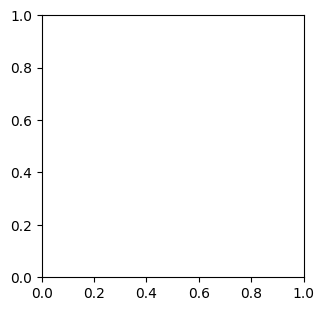

In [5]:
# Plotting 12 images to check dataset

plt.figure(figsize = (12, 12))
dataset_path = "C:\Plant-Disease-Detection\Dataset\Potato___Early_blight"

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img = imread(dataset_path +'/'+ random.choice(sorted(os.listdir(dataset_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) # width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10) # height of image

### Convert the images into a Numpy array and normalize them

In [6]:
# Converting Images to array 

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256, 256))  
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [7]:
dataset_path = "C:\Plant-Disease-Detection\Dataset"
labels = os.listdir(dataset_path)

print(labels)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Myste\AppData\Local\Temp\ipykernel_7936\1294998600.py:1: SyntaxWarning: invalid escape sequence '\P'
  dataset_path = "C:\Plant-Disease-Detection\Dataset"
C:\Users\Myste\AppData\Local\Temp\ipykernel_7936\1294998600.py:1: SyntaxWarning: invalid escape sequence '\P'
  dataset_path = "C:\Plant-Disease-Detection\Dataset"


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Plant-Disease-Detection\\Dataset'

In [8]:
dataset_path = "C:\Plant-Disease-Detection\Dataset"
root_dir = listdir(dataset_path)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0, 1, 2]
temp = -1

# Reading and converting image to numpy array

for directory in root_dir:
  plant_image_list = listdir(f"{dataset_path}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dataset_path}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Myste\AppData\Local\Temp\ipykernel_7936\3844920039.py:1: SyntaxWarning: invalid escape sequence '\P'
  dataset_path = "C:\Plant-Disease-Detection\Dataset"
C:\Users\Myste\AppData\Local\Temp\ipykernel_7936\3844920039.py:1: SyntaxWarning: invalid escape sequence '\P'
  dataset_path = "C:\Plant-Disease-Detection\Dataset"


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Plant-Disease-Detection\\Dataset'

### Visualize the class count and Check for class imbalance

In [9]:
# Visualize the number of classes count

label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

NameError: name 'label_list' is not defined

In [10]:
# it is a balanced dataset as we can see

In [11]:
# Next we will observe the shape of the image.

image_list[0].shape

NameError: name 'image_list' is not defined

In [12]:
# Checking the total number of the images which is the length of the labels list.

label_list = np.array(label_list)
label_list.shape

NameError: name 'label_list' is not defined

### Splitting the dataset into train, validate and test sets

In [13]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

NameError: name 'train_test_split' is not defined

In [14]:
# Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.

x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

NameError: name 'x_train' is not defined

### Performing one-hot encoding on target variable

In [15]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

NameError: name 'to_categorical' is not defined

### Creating the model architecture, compile the model and then fit it using the training data

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = "same",input_shape = (256, 256, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Conv2D(16, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(8, activation = "relu"))
model.add(Dense(3, activation = "softmax"))
model.summary()

c:\Users\Myste\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 85, 85, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │       225,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,347 (903.70 KB)

 Trainable params: 231,347 (903.70 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics = ['accuracy'])

In [18]:
# Splitting the training data set into training and validation data sets

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)

NameError: name 'train_test_split' is not defined

In [19]:
# Training the model

epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

NameError: name 'x_train' is not defined

In [20]:
model.save("C:\Plant-Disease-Detection\Model\plant_disease_model.h5")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Myste\AppData\Local\Temp\ipykernel_7936\453566823.py:1: SyntaxWarning: invalid escape sequence '\P'
  model.save("C:\Plant-Disease-Detection\Model\plant_disease_model.h5")


### Plot the accuracy and loss against each epoch

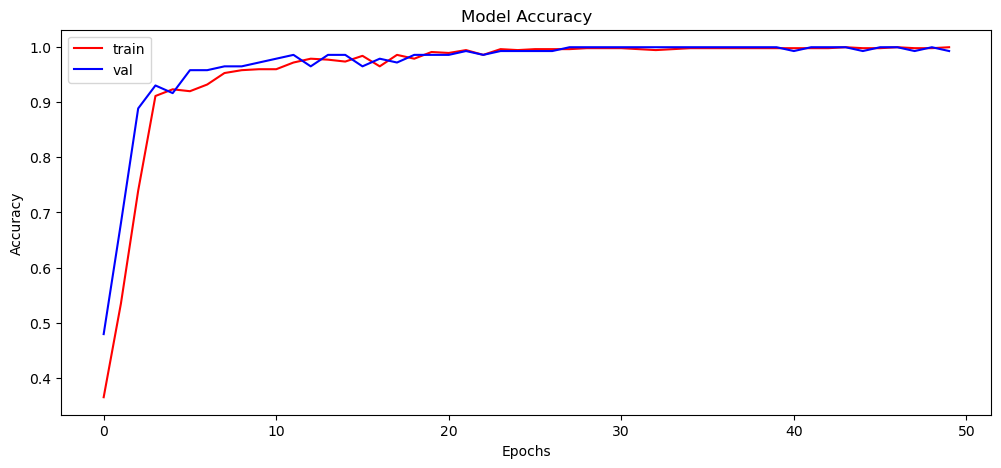

In [40]:
# Plot the training history

plt.figure(figsize = (12, 5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [21]:
print("Calculating model accuracy")

scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1] * 100}")

Calculating model accuracy


NameError: name 'x_test' is not defined

### Make predictions on testing data

In [22]:
y_pred = model.predict(x_test)

NameError: name 'x_test' is not defined

### Visualizing the original and predicted labels for the test images

In [23]:
# Plotting image to compare

img = array_to_img(x_test[11])
img

NameError: name 'x_test' is not defined

In [24]:
# Finding max value from predition list and comaparing original value vs predicted

print("Originally : ", all_labels[np.argmax(y_test[11])])
print("Predicted : ", all_labels[np.argmax(y_pred[4])])
print(y_pred[2])

NameError: name 'all_labels' is not defined

In [25]:
for i in range(50):
    print (all_labels[np.argmax(y_test[i])], " ", all_labels[np.argmax(y_pred [1])])

NameError: name 'all_labels' is not defined